# Data Overview and Exploratory Analysis

This notebook provides an overview and exploratory data analysis (EDA) of the cardiovascular disease dataset used in this project.

In [2]:
##### Imports and Data Loading #####
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

# Load the data
data = pd.read_csv(
    "../data/2025_cardio_train.csv",
    index_col=0,
    na_filter=False,
    dtype={
        "gender": "category",
        "cholesterol": "category",
        "gluc": "category",
        "smoke": "category",
        "alco": "category",
        "active": "category",
        "cardio": "category",
    }
)

# Set ordered categories
data["cholesterol"] = data["cholesterol"].cat.as_ordered()
data["gluc"] = data["gluc"].cat.as_ordered()

In [3]:
##### Data Types and Unique Values #####
for var in data.columns:
    print(f"Variable {var} in type {data[var].dtype} with {data[var].nunique()} unique values")
    if data[var].dtype == "category":
        print(f"  | Ordered? {data[var].cat.ordered}")
print(f"Cholesterol categories: {data['cholesterol'].unique()}")
print(f"Gluc categories: {data['gluc'].unique()}")

Variable age in type int64 with 8076 unique values
Variable gender in type category with 2 unique values
  | Ordered? False
Variable height in type int64 with 109 unique values
Variable weight in type float64 with 287 unique values
Variable ap_hi in type int64 with 153 unique values
Variable ap_lo in type int64 with 157 unique values
Variable cholesterol in type category with 3 unique values
  | Ordered? True
Variable gluc in type category with 3 unique values
  | Ordered? True
Variable smoke in type category with 2 unique values
  | Ordered? False
Variable alco in type category with 2 unique values
  | Ordered? False
Variable active in type category with 2 unique values
  | Ordered? False
Variable cardio in type category with 2 unique values
  | Ordered? False
Cholesterol categories: ['1', '3', '2']
Categories (3, object): ['1' < '2' < '3']
Gluc categories: ['1', '2', '3']
Categories (3, object): ['1' < '2' < '3']


In [4]:
##### Missing Values Analysis #####
print("Missing values per column:")
print(data.isna().sum())

Missing values per column:
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [ ]:
data.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [ ]:
##### Descriptive Statistics #####
display(data.describe())

,age,height,weight,ap_hi,ap_lo
count,68947.000000,68947.000000,68947.000000,68947.000000,68947.000000
mean,19463.175454,164.357535,74.109323,126.253122,81.306685
std,2468.615096,8.203546,14.321328,17.531657,9.819127
min,10798.000000,55.000000,11.000000,7.000000,0.000000
25%,17656.000000,159.000000,65.000000,120.000000,80.000000
50%,19700.000000,165.000000,72.000000,120.000000,80.000000
75%,21323.000000,170.000000,82.000000,140.000000,90.000000
max,23713.000000,250.000000,200.000000,200.000000,190.000000


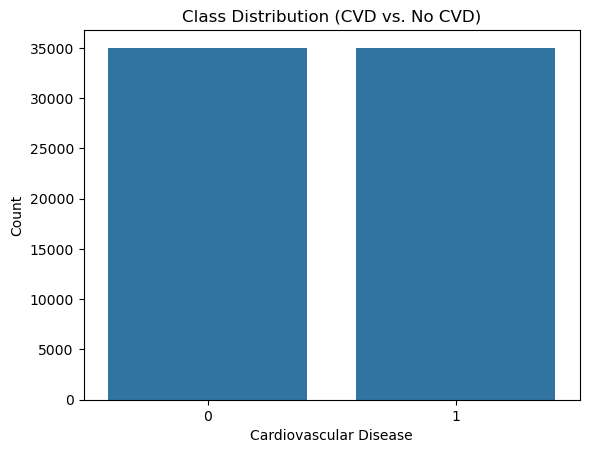

In [6]:
##### Class Distribution Visualization #####
sns.countplot(x="cardio", data=data)
plt.title("Class Distribution (CVD vs. No CVD)")
plt.xlabel("Cardiovascular Disease")
plt.ylabel("Count")
plt.show()

In [7]:
##### Outlier Detection #####
print("Systolic BP > 200:", data[data["ap_hi"] > 200]["ap_hi"].count())
print("Diastolic BP > 200:", data[data["ap_lo"] > 200]["ap_lo"].count())

##### Outlier Removal #####
data = data[(data["ap_hi"] <= 200) & (data["ap_hi"] >= 0)]
data = data[(data["ap_lo"] <= 200) & (data["ap_lo"] >= 0)]

Systolic BP > 200: 100
Diastolic BP > 200: 953


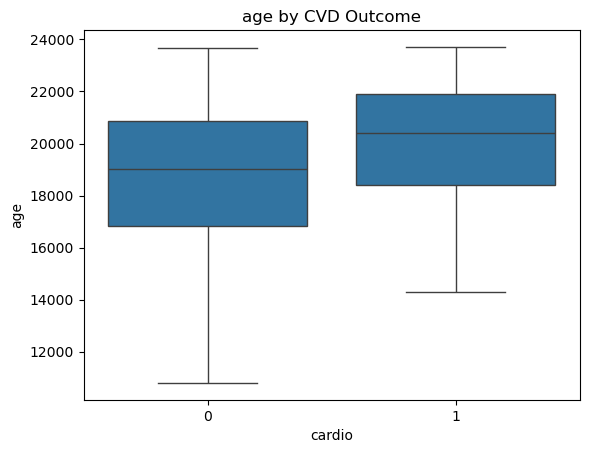

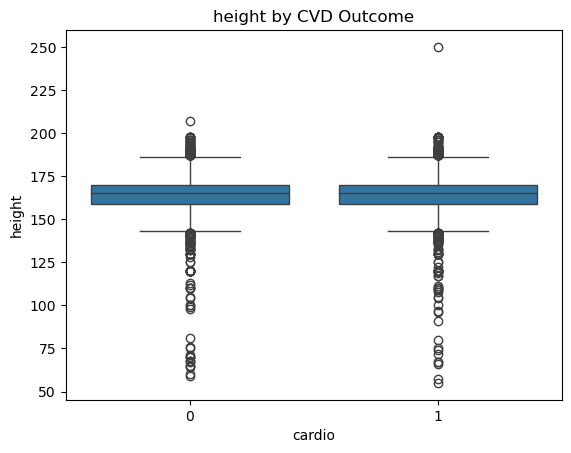

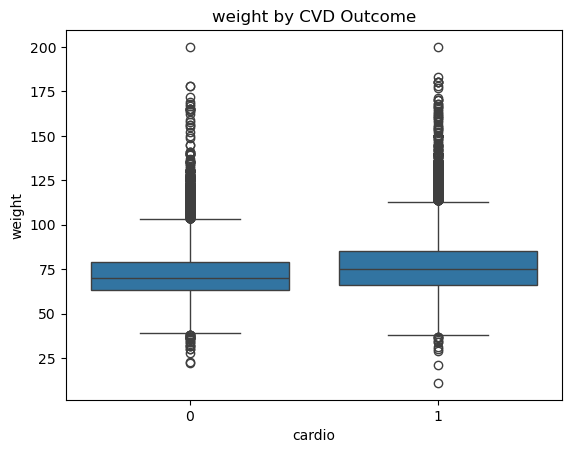

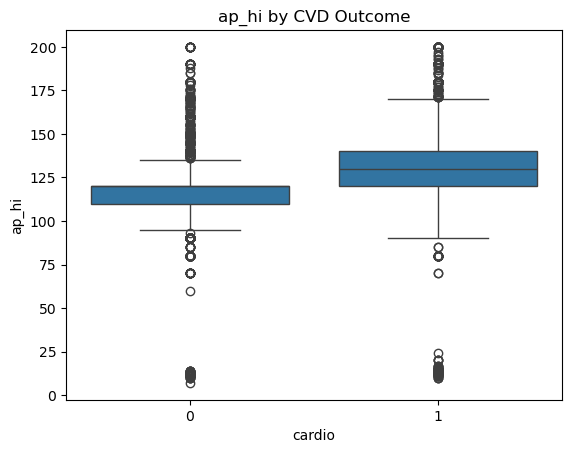

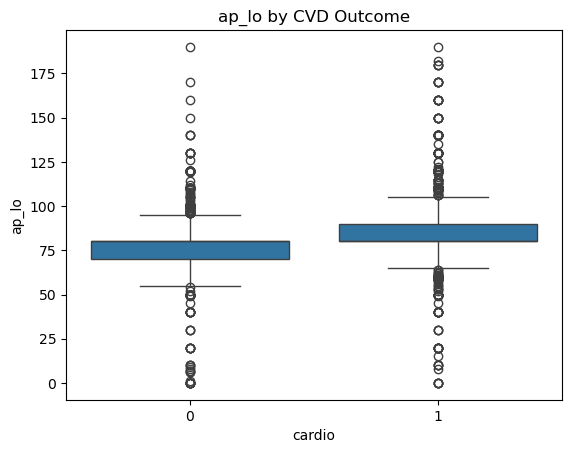

In [8]:
##### Feature Distribution Visualization #####
# Numerical features by class
num_vars = ["age", "height", "weight", "ap_hi", "ap_lo"]
for var in num_vars:
    plt.figure()
    sns.boxplot(x="cardio", y=var, data=data)
    plt.title(f"{var} by CVD Outcome")
    plt.show()

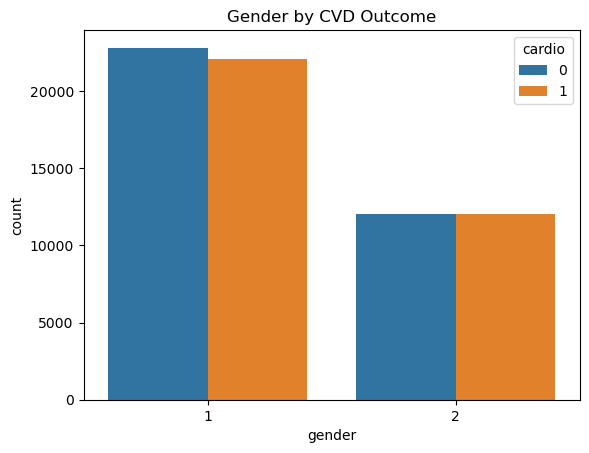

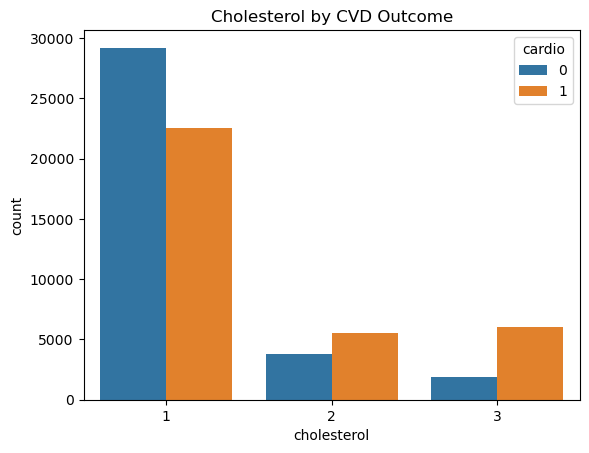

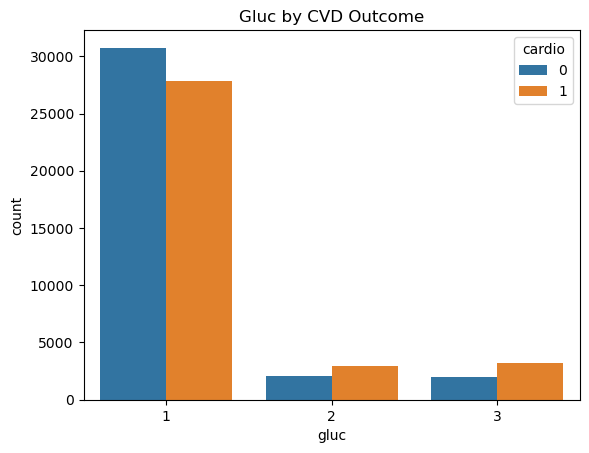

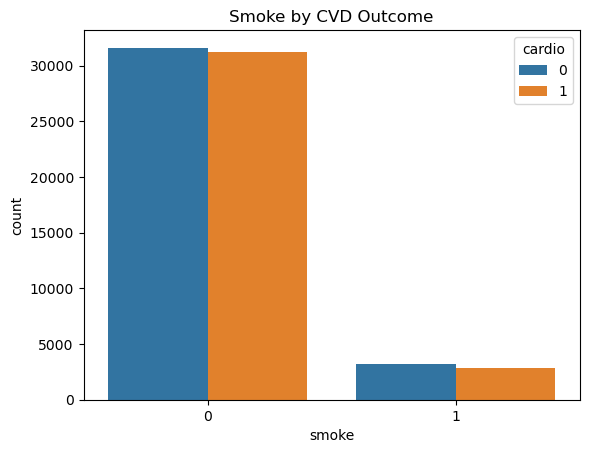

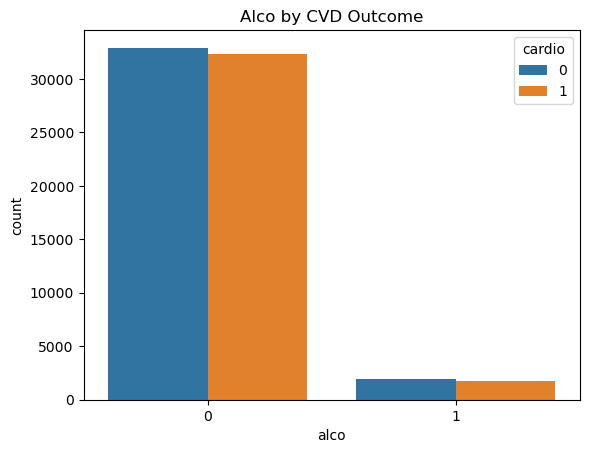

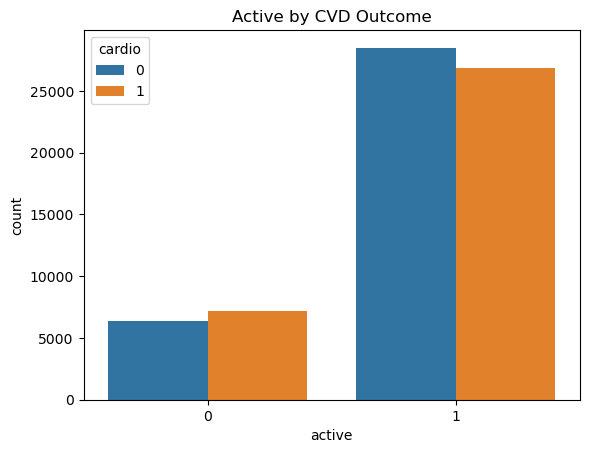

In [9]:
##### Categorical Feature Count Visualization #####
cat_vars = ["gender", "cholesterol", "gluc", "smoke", "alco", "active"]
for var in cat_vars:
    plt.figure()
    sns.countplot(x=var, hue="cardio", data=data)
    plt.title(f"{var.capitalize()} by CVD Outcome")
    plt.show()

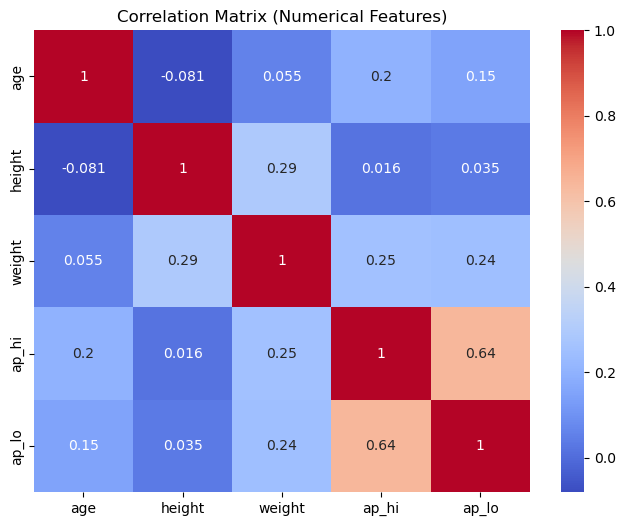

In [10]:
##### Correlation Matrix Visualization #####
plt.figure(figsize=(8,6))
sns.heatmap(data[num_vars].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

Mann-Whitney U for age: p=0.0000e+00
Mann-Whitney U for height: p=1.6009e-03
Mann-Whitney U for weight: p=0.0000e+00
Mann-Whitney U for ap_hi: p=0.0000e+00
Mann-Whitney U for ap_lo: p=0.0000e+00


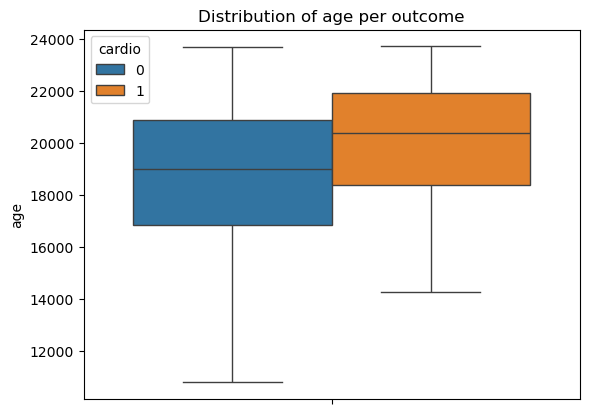

whiu for age : 0.0


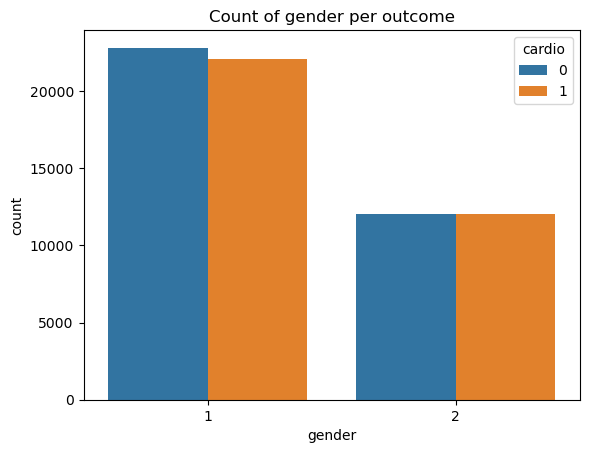

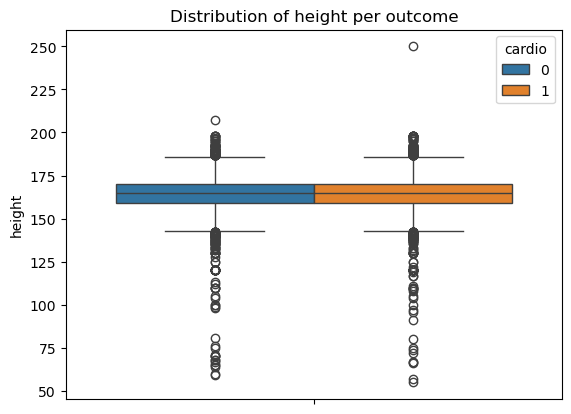

whiu for height : 0.0016008756425573197


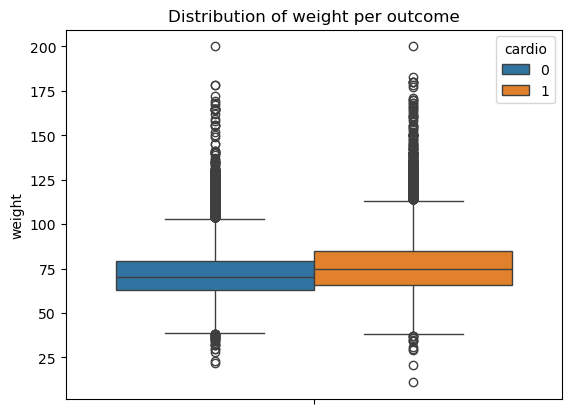

whiu for weight : 0.0


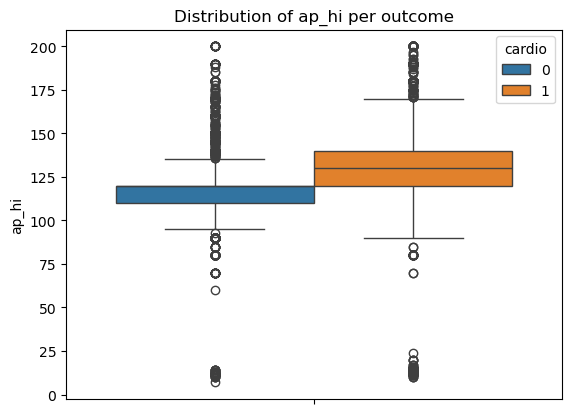

whiu for ap_hi : 0.0


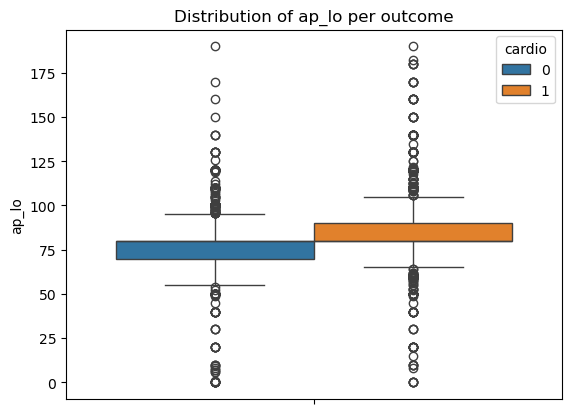

whiu for ap_lo : 0.0


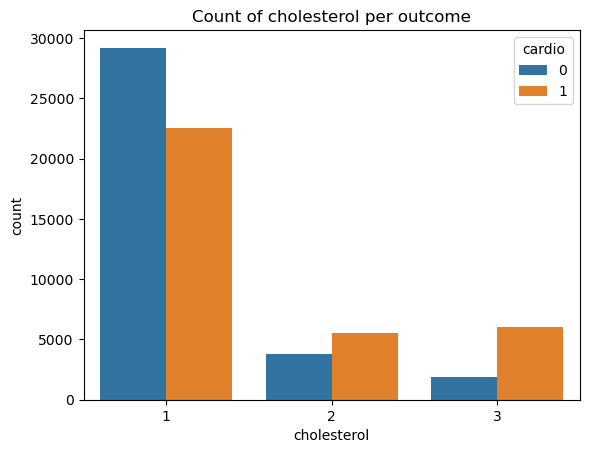

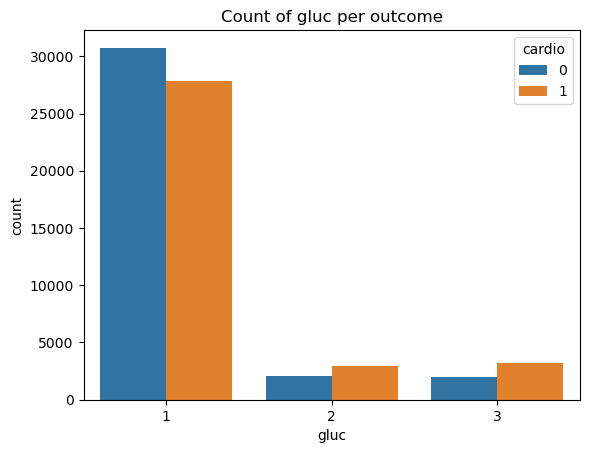

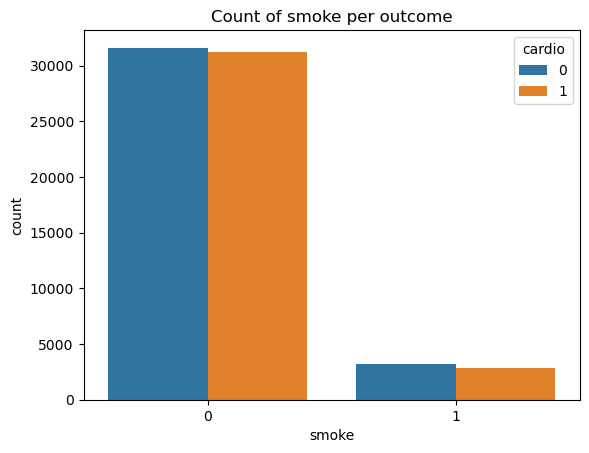

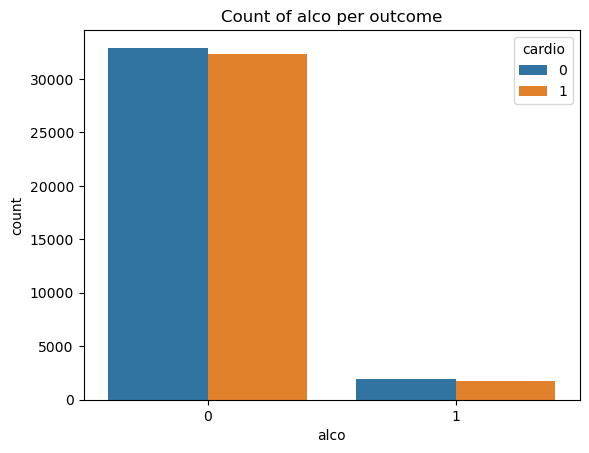

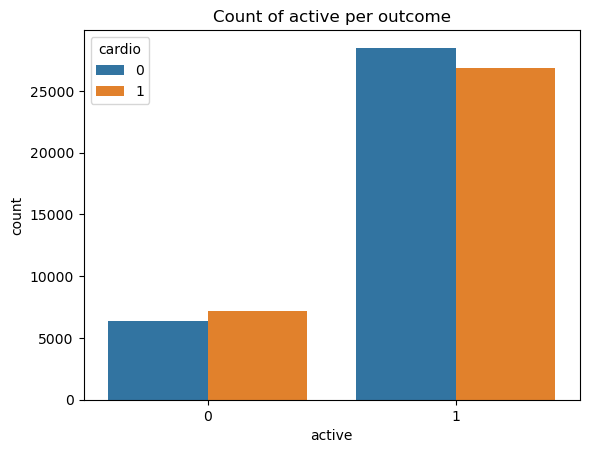

In [12]:
##### Statistical Tests #####
# Mann-Whitney U or t-test for numerical features by class
for var in num_vars:
    group_0 = data[data['cardio'] == "0"][var]
    group_1 = data[data['cardio'] == "1"][var]
    # Normality check
    stat_0 = sts.anderson(group_0, dist='norm').statistic
    stat_1 = sts.anderson(group_1, dist='norm').statistic
    crit_0 = sts.anderson(group_0, dist='norm').critical_values[2]
    crit_1 = sts.anderson(group_1, dist='norm').critical_values[2]
    if stat_0 > crit_0 or stat_1 > crit_1:
        p = sts.mannwhitneyu(group_0, group_1)[1]
        print(f"Mann-Whitney U for {var}: p={p:.4e}")
    else:
        p = sts.ttest_ind(group_0, group_1)[1]
        print(f"T-test for {var}: p={p:.4e}")


p_list = []
SIGNIFICANCE_LEVEL = 0.05
for var in data.columns:
    if data[var].dtype == "category" and not var == "cardio":
        plt.figure()
        plot_a = sns.countplot(x = var,
                             hue = "cardio",
                             data = data
        )
        plot_a.set_title(f"Count of {var} per outcome")
        plt.show()
        
        p_list.append(sts.chi2_contingency(pd.crosstab(data[var],data["cardio"]))[1])
        
    elif not var == "cardio":
        plt.figure()
        plot_a = sns.boxplot(y = var,
                             hue = "cardio",
                             data = data
        )
        plot_a.set_title(f"Distribution of {var} per outcome")
        plt.show()
        group_1 = data[data['cardio'] == "0"][var]
        group_2 = data[data['cardio'] == "1"][var]
        pval_1 = sts.anderson(group_1, dist='norm')
        pval_2 = sts.anderson(group_2, dist="norm")
        stat_1 = pval_1.statistic
        stat_2 = pval_2.statistic
        critical_value_1 = pval_1.critical_values[2]  # 5% significance level
        critical_value_2 = pval_2.critical_values[2]  # 5% significance level


        if stat_1 > critical_value_1 or stat_2 > critical_value_2:
            p = sts.mannwhitneyu(group_1, group_2)[1]
            print(f"whiu for {var} : {p}")
        else:
            p = sts.ttest_ind(group_1, group_2)[1]
            print(f"t-test for {var}")

        p_list.append(p)

In [13]:
print(p_list)
print(data.columns)

[0.0, 0.05653042376765084, 0.0016008756425573197, 0.0, 0.0, 0.0, 0.0, 6.920746087383077e-127, 1.5609310747959953e-05, 0.031170525814777267, 1.295438896788674e-22]
Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')
